# New Section

In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "pratyushsinha0811" # username
os.environ['KAGGLE_KEY'] = "641a2cb01104d1b3efb527e911110250" # key

In [ ]:
!kaggle datasets download -d varpit94/disaster-images-dataset

100% 652M/654M [00:03<00:00, 215MB/s]
100% 654M/654M [00:03<00:00, 206MB/s]


In [ ]:
!unzip disaster-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0701.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0702.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0703.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0704.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0705.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0706.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0707.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0708.png  
  inflating: Comprehensive Disaster Dataset(CDD)/Non_Damage/Non_Damage_Wildlife_Forest/06_03_0709.png  
  inflating: 

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#The documentation says mobilenet_v2 comes in the input size of (224,224) pixels
IMAGE_SHAPE = (224, 224)

#Importig mobilenet_v2 classification model
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
#Obtaining the images
import pathlib
data_dir = pathlib.Path("/content/Comprehensive Disaster Dataset(CDD)")
data_dir

PosixPath('/content/Comprehensive Disaster Dataset(CDD)')

In [ ]:
list(data_dir.glob('*/*.png'))[:5]

[PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0155.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0090.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0168.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0182.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0208.png')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1276


In [ ]:
earthquake = list(data_dir.glob('Damaged_Infrastructure/Earthquake/*'))
earthquake[:5]

[PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0004.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0002.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0034.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0011.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0010.png')]

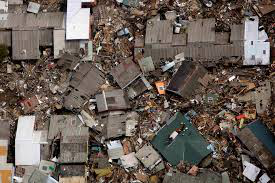

In [ ]:
#We can see the actual image using PIL.Image
import PIL
PIL.Image.open(str(earthquake[1]))

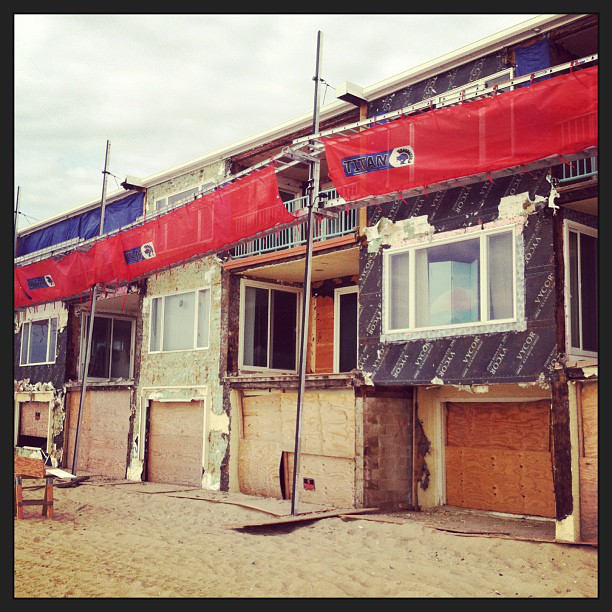

In [ ]:
Damaged_Infrastructure = list(data_dir.glob('Damaged_Infrastructure/Infrastructure/*'))
PIL.Image.open(str(Damaged_Infrastructure[0]))

In [ ]:
#Making a dictionary so the key is the name of disaster/non-disaster and the value is the list of all the images of that key

disaster_images_dict = {
    'earthquake': list(data_dir.glob('Damaged_Infrastructure/Earthquake/*')),
    'damaged_infrastructure': list(data_dir.glob('Damaged_Infrastructure/Infrastructure/*')),
    'urban_fire': list(data_dir.glob('Fire_Disaster/Urban_Fire/*')),
    'wild_fire': list(data_dir.glob('Fire_Disaster/Wild_Fire/*')),
    'human_damage': list(data_dir.glob('Human_Damage/*')),
    'drought': list(data_dir.glob('Land_Disaster/Drought/*')),
    'land_slide': list(data_dir.glob('Land_Disaster/Land_Slide/*')),
    'non_damage_buildings_street': list(data_dir.glob('Non_Damage/Non_Damage_Buildings_Street/*')),
    'non_damage_wildfire_forest': list(data_dir.glob('Non_Damage/Non_Damage_Wildlife_Forest/*')),
    'non_damaged_human': list(data_dir.glob('Non_Damage/human/*')),
    'non_damaged_sea': list(data_dir.glob('Non_Damage/sea/*')),
    'water_disaster': list(data_dir.glob('Water_Disaster/*'))
}

In [ ]:
#Making a dictionary which assigns a label value to all keys

disaster_labels_dict = {
    'earthquake':0,
    'damaged_infrastructure':1, 
    'urban_fire': 2,
    'wild_fire':3,
    'human_damage':4, 
    'drought':5,
    'land_slide':6, 
    'non_damage_buildings_street':7, 
    'non_damage_wildfire_forest':8,
    'non_damaged_human':9,
    'non_damaged_sea':10,
    'water_disaster': 11
}

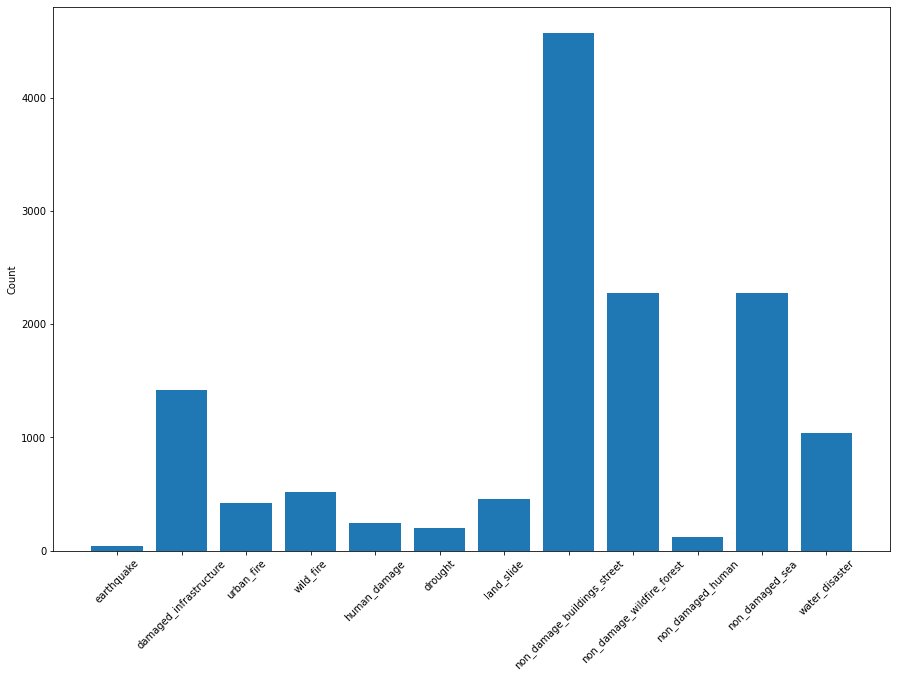

In [ ]:
#Displaying no. of images available for each item in the dataset

disaster_count={}
for key, val in disaster_images_dict.items():
  disaster_count[key]=len(val)

plt.figure(figsize=(15,10))
plt.bar(*zip(*disaster_count.items()))
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

#We notice that non_damage_building_street images are the most abundant while earthquake images are available the least

In [ ]:
#Image pre-processing
#We resize all our images according to configuration req by mobilenet_v2
X, y = [], []

for disaster_name, images in disaster_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        try:
           resized_img = cv2.resize(img, IMAGE_SHAPE)
        except:
          break
        X.append(resized_img)
        y.append(disaster_labels_dict[disaster_name])

       

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0].shape


(224, 224, 3)

In [ ]:
#Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Colour Scale is from 0 to 255. Hence, we for normalization, we divide by 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled = X_train/255

In [ ]:
#Resizing

x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

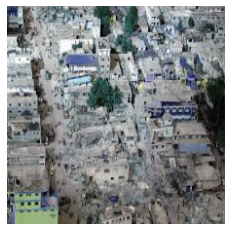

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1) #Gives the maximum value
predicted

array([795, 795, 795])

In [ ]:
#Retraining model using disaster images
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_disasters = 12

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_disasters)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=3)

Epoch 1/3
318/318 [==============================] - 54s 159ms/step - loss: 0.4689 - acc: 0.8584
Epoch 2/3
318/318 [==============================] - 49s 155ms/step - loss: 0.2085 - acc: 0.9344
Epoch 3/3
318/318 [==============================] - 48s 150ms/step - loss: 0.1619 - acc: 0.9483


In [ ]:
model.evaluate(X_test_scaled,y_test)

106/106 [==============================] - 13s 115ms/step - loss: 0.2370 - acc: 0.9252


[0.23704786598682404, 0.9252142906188965]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report



In [ ]:
yp=model.predict(X_test_scaled)
yp[:5]

array([[-11.343765  ,  -5.424765  ,  -3.6521425 ,  -7.9543037 ,
         -9.646614  ,  -9.716276  ,  -8.260374  ,   3.3906343 ,
         -5.121573  ,  -9.454197  ,  -5.063812  ,  -7.3863153 ],
       [ -9.601772  ,  -6.0760617 ,  -5.081906  ,  -5.0148244 ,
         -8.9758835 ,  -8.777328  ,  -7.143662  ,  -0.09929327,
          6.7071366 ,  -7.8614306 ,  -4.167278  ,  -5.587956  ],
       [ -8.844616  ,  -5.32538   ,  -4.8137717 , -11.960672  ,
         -8.105055  , -11.718465  ,  -9.180437  ,   5.4399314 ,
         -8.757998  , -10.178912  ,  -4.2824645 ,  -5.1980343 ],
       [ -9.079375  ,  -4.775842  ,  -4.107176  ,  -8.505719  ,
        -10.5580225 , -12.280374  ,  -7.2702236 ,   4.1984477 ,
         -6.1150413 , -11.908864  ,  -5.5373607 ,  -7.0277815 ],
       [ -5.392044  ,  -4.2960415 ,  -2.63243   ,  -6.4788246 ,
         -6.016863  ,  -6.8100343 ,  -5.1707053 ,   5.4899015 ,
         -4.3131003 ,  -7.4926233 ,  -4.5525985 ,  -5.0941906 ]],
      dtype=float32)

In [ ]:

np.argmax(yp[0])

7

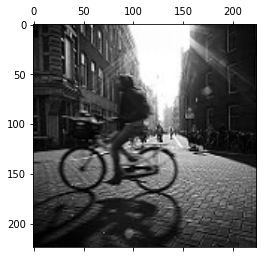

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in yp]

In [ ]:
y_predicted_labels[:5]

[7, 8, 7, 7, 7]

In [ ]:
#Building confusion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(12, 12), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0,    0,    6,    0,    0,    0,    0,
           0],
       [   0,  310,    5,    0,    2,    1,    4,    2,    1,    0,    1,
           6],
       [   0,   13,   77,    9,    1,    0,    3,    0,    1,    0,    3,
           2],
       [   0,    1,   19,   93,    0,    1,    1,    1,    0,    0,    1,
           0],
       [   0,    7,    0,    0,   50,    0,    1,    0,    0,    3,    0,
           0],
       [   0,    3,    0,    1,    0,   36,    2,    0,    0,    0,    1,
           3],
       [   5,   23,    3,    1,    1,    0,   61,    3,    0,    0,    2,
          12],
       [   0,    2,    1,    0,    0,    0,    0, 1094,    1,    0,    7,
           0],
       [   0,    0,    0,    1,    0,    0,    1,    1,  582,    0,    5,
           0],
       [   0,    0,    0,    0,    4,    0,    0,    0,    0,   26,    0,
           0],
       [   0,    0,    1,    1,    0,    0,    0,    5,    2, 

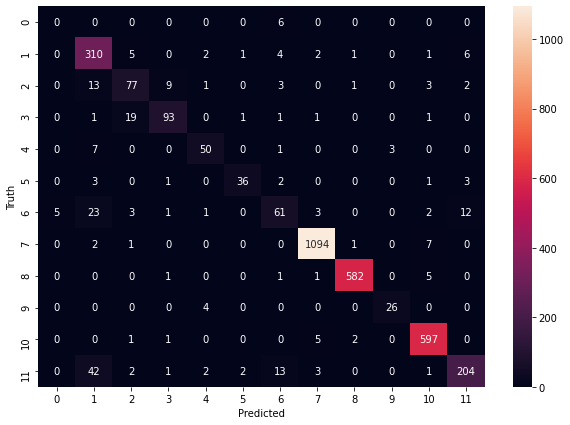

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()